# <span style="color:#FF7B07"><div align="center">**Import Libraries and Load Data** <a  name="2"></a>

In [1]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

In [2]:
# The data is large and this command will help us to see the whole result 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv('../data/myFitnessPal_data_prepared_to_use.csv')

In [5]:
data = data[data["logged_frequency"]>0.05]

In [7]:
data["reach_goal"].value_counts()

0.0    4852
1.0    2005
Name: reach_goal, dtype: int64

In [8]:
print(f'\n Data shape - {data.shape} ')
print(f' Unique users - {data["user_id"].nunique()} \n')
data.head(3)


 Data shape - (6857, 105) 
 Unique users - 6857 



,user_id,total_calories,total_carbs,total_fat,total_protein,total_sodium,total_sugar,goal_calories,goal_carbs,goal_fat,goal_protein,goal_sodium,goal_sugar,foods_len,healtyDistrib,calories_diff,carbs_diff,fat_diff,protein_diff,sodium_diff,sugar_diff,total_calories_1,total_carbs_1,total_fat_1,total_protein_1,total_sodium_1,total_sugar_1,goal_calories_1,goal_carbs_1,goal_fat_1,goal_protein_1,goal_sodium_1,goal_sugar_1,foods_len_1,healtyDistrib_1,calories_diff_1,carbs_diff_1,fat_diff_1,protein_diff_1,sodium_diff_1,sugar_diff_1,total_calories_2,total_carbs_2,total_fat_2,total_protein_2,total_sodium_2,total_sugar_2,goal_calories_2,goal_carbs_2,goal_fat_2,goal_protein_2,goal_sodium_2,goal_sugar_2,foods_len_2,healtyDistrib_2,calories_diff_2,carbs_diff_2,fat_diff_2,protein_diff_2,sodium_diff_2,sugar_diff_2,total_calories_3,total_carbs_3,total_fat_3,total_protein_3,total_sodium_3,total_sugar_3,goal_calories_3,goal_carbs_3,goal_fat_3,goal_protein_3,goal_sodium_3,goal_sugar_3,foods_len_3,healtyDistrib_3,calories_diff_3,carbs_diff_3,fat_diff_3,protein_diff_3,sodium_diff_3,sugar_diff_3,total_calories_4,total_carbs_4,total_fat_4,total_protein_4,total_sodium_4,total_sugar_4,goal_calories_4,goal_carbs_4,goal_fat_4,goal_protein_4,goal_sodium_4,goal_sugar_4,foods_len_4,healtyDistrib_4,calories_diff_4,carbs_diff_4,fat_diff_4,protein_diff_4,sodium_diff_4,sugar_diff_4,logged_frequency,days_missed,reach_goal,FoodGroup
0,1.0,0.227103,0.101911,0.043995,0.041911,0.118915,0.015625,0.365264,0.136300,0.088737,0.091541,0.383333,0.015526,0.065574,0.034141,0.653198,0.431066,0.605364,0.585885,0.625124,0.490772,0.174019,0.167728,0.064209,0.095557,0.308067,0.024802,0.425715,0.159249,0.104096,0.106605,0.383333,0.018158,0.081967,0.037289,0.710388,0.417739,0.599234,0.559419,0.512950,0.486848,0.210374,0.198514,0.071344,0.082146,0.245480,0.026042,0.391537,0.146036,0.095563,0.098494,0.383333,0.016579,0.098361,0.003663,0.673366,0.395680,0.590805,0.564089,0.550066,0.485249,0.187009,0.119958,0.096314,0.169321,0.153129,0.017609,0.371076,0.138387,0.090444,0.092700,0.383333,0.015789,0.081967,0.227308,0.684556,0.424632,0.572414,0.507525,0.604833,0.489754,0.201682,0.191083,0.105826,0.096396,0.277886,0.020833,0.369216,0.137691,0.090444,0.092700,0.383333,0.015789,0.114754,0.108376,0.673159,0.393382,0.566284,0.552673,0.530848,0.487865,0.919355,0.034483,1.0,3.0
1,2.0,0.197850,0.309979,0.084423,0.048617,0.108762,0.033482,0.283422,0.106398,0.069966,0.070684,0.383333,0.012105,0.147541,0.066322,0.650504,0.321232,0.570881,0.572392,0.631145,0.478419,0.124019,0.160297,0.051130,0.025147,0.082754,0.018353,0.329923,0.123783,0.080205,0.082271,0.383333,0.013947,0.163934,0.070761,0.718884,0.397518,0.596935,0.592112,0.646569,0.488301,0.133738,0.204883,0.049941,0.045264,0.348122,0.017361,0.329923,0.123783,0.080205,0.082271,0.383333,0.013947,0.245902,0.032211,0.711701,0.378217,0.597701,0.579657,0.489195,0.488882,0.137664,0.173036,0.038050,0.036044,0.497497,0.014881,0.329923,0.123783,0.080205,0.082271,0.383333,0.013947,0.196721,0.034864,0.708800,0.392004,0.605364,0.585366,0.400610,0.490336,0.134953,0.183652,0.042806,0.041073,0.302503,0.014881,0.329923,0.123783,0.080205,0.082271,0.383333,0.013947,0.262295,0.029449,0.710803,0.387408,0.602299,0.582252,0.516249,0.490336,0.317204,0.005747,1.0,18.0
3,4.0,0.099907,0.135881,0.038050,0.040235,0.172045,0.157490,0.475936,0.178025,0.175768,0.078795,0.383333,0.921053,0.131148,0.004963,0.780080,0.443934,0.648276,0.581214,0.593616,0.907717,0.091963,0.165605,0.026159,0.027661,0.185675,0.151290,0.357359,0.133519,0.131399,0.059096,0.383333,0.921053,0.081967,0.050556,0.750725,0.401654,0.636015,0.580176,0.585533,0.911350,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,

In [85]:
# matrix = data[data.columns[1:21]].corr()
# f, ax = plt.subplots(figsize=(12, 6))
# with sns.axes_style("white"):
#     sns.heatmap(matrix,mask=np.triu(matrix,1),annot=True,fmt=".2f", vmax=.8,cbar=False,cmap="coolwarm");

In [9]:
X = data.drop(columns=['reach_goal'])
#X = data[data.columns[1:21]].drop(columns=["goal_calories","goal_carbs","goal_fat","goal_protein","goal_sodium","goal_sugar"])
y = data['reach_goal']
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [10]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# #apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(10,'Score'))  #print 10 best features

In [13]:
sm = SMOTE(random_state=42)

X_train_s,y_train_s =sm.fit_sample(X_train,y_train)
X_test_s,y_test_s =sm.fit_sample(X_test,y_test)

C:\Users\Raffael Kalandadze\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Raffael Kalandadze\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


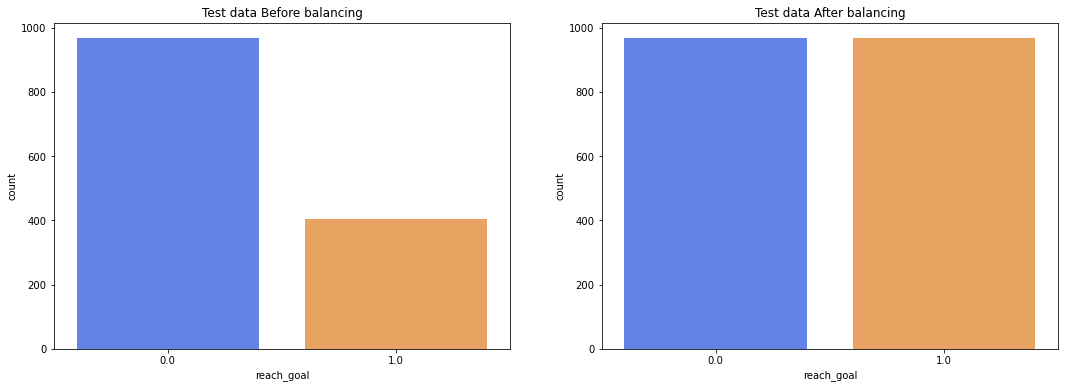

In [14]:
f, ax  = plt.subplots(1,2,figsize = (18,6))
sns.countplot(y_test,ax=ax[0],palette = 'bright',alpha=0.7,).set_title('Test data Before balancing')

sns.countplot(y_test_s,ax=ax[1],palette = 'bright',alpha=0.7).set_title('Test data After balancing')

plt.show()

C:\Users\Raffael Kalandadze\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Raffael Kalandadze\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


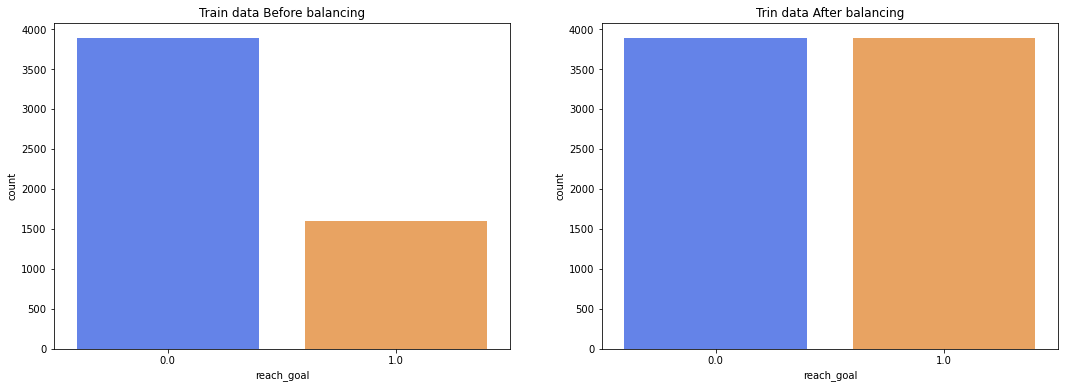

In [15]:
f, ax  = plt.subplots(1,2,figsize = (18,6))
sns.countplot(y_train,ax=ax[0],palette = 'bright',alpha=0.7).set_title('Train data Before balancing')

sns.countplot(y_train_s,ax=ax[1],palette = 'bright',alpha=0.7).set_title('Trin data After balancing')

plt.show()

X_train = X_train_s
y_train = y_train_s
X_test = X_test_s
y_test = y_test_s

In [114]:
cv = KFold(n_splits=10,shuffle = True,random_state=42)
accuracies = list()
depth_range = range(1, 10)

# Testing max_depths from 1 to 10
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(max_depth = depth,random_state = 42)

    for train_fold, valid_fold in cv.split(X_train):
        f_train_x = X_train.iloc[train_fold] 
        f_train_y = y_train.iloc[train_fold]
        
        f_valid_x = X_train.iloc[valid_fold]
        f_valid_y = y_train.iloc[valid_fold]

        model = tree_model.fit(X = f_train_x,y = f_train_y) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid_x,y = f_valid_y) # We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.634106
         2          0.661519
         3          0.664221
         4          0.680566
         5          0.695109
         6          0.702317
         7          0.708494
         8          0.713514
         9          0.713127


In [109]:
decision_tree = DecisionTreeClassifier(max_depth=7,random_state=42)
decision_tree.fit(X_train, y_train)

# Predicting results for test dataset
y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)

In [110]:
# from sklearn import tree
# fig = plt.figure(figsize=(35,18))
# _ = tree.plot_tree(decision_tree, feature_names=X_train.columns,class_names=['0','1'],filled=True,fontsize = 17)

In [111]:
def classification_metrics(yTrueTrain,yPredictTrain,yTrueTest,yPredictTest,heatmap=False)->None:
    """
    this function prints accuracy, precision, recall, F1 scre 
    and create confusion matrix  heatmap for both train and test sets
    
    Arguments:
    yTrueTrain -- the true value of prediction from the train set
    yPredictTrain -- predicted value from the train set
    yTrueTest -- he true value of prediction from the test set
    yPredictTest -- predicted value from the test set
    heatmap -- boolean which tells us if plot heatmap or not
    
    Returns:
    None
    """
    print("train data:\t  "+ "\t"*6+ "test data:\t\n")
    print(("accuracy:\t {0} "+ "\t"*6+ "accuracy:\t {1}").format(accuracy_score(yTrueTrain, yPredictTrain).round(2), 
                                                                 accuracy_score(yTrueTest, yPredictTest).round(2)))
          
    print(("precision:\t {0} "+ "\t"*6+ "precision:\t {1}").format(precision_score(yTrueTrain, yPredictTrain).round(2), 
                                                                   precision_score(yTrueTest, yPredictTest).round(2)))
    
    print(("recall:\t\t {0} "+ "\t"*6+ "recall:\t\t {1}").format(recall_score(yTrueTrain, yPredictTrain).round(2), 
                                                                 recall_score(yTrueTest, yPredictTest).round(2)))
    
    print(("F1:\t\t {0} "+ "\t"*6+ "F1:\t\t {1}").format(f1_score(yTrueTrain, yPredictTrain).round(2), 
                                                         f1_score(yTrueTest, yPredictTest).round(2)))
    if(heatmap):
        f, ax  = plt.subplots(1,2,figsize = (18,6))
        sns.heatmap(confusion_matrix(yTrueTrain,yPredictTrain),cmap='coolwarm',annot=True,ax=ax[0])
        sns.heatmap(confusion_matrix(yTrueTest,yPredictTest),cmap='coolwarm',annot=True,ax=ax[1])
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

train data:	  						test data:	

accuracy:	 0.76 						accuracy:	 0.71
precision:	 0.74 						precision:	 0.7
recall:		 0.8 						recall:		 0.73
F1:		 0.77 						F1:		 0.71


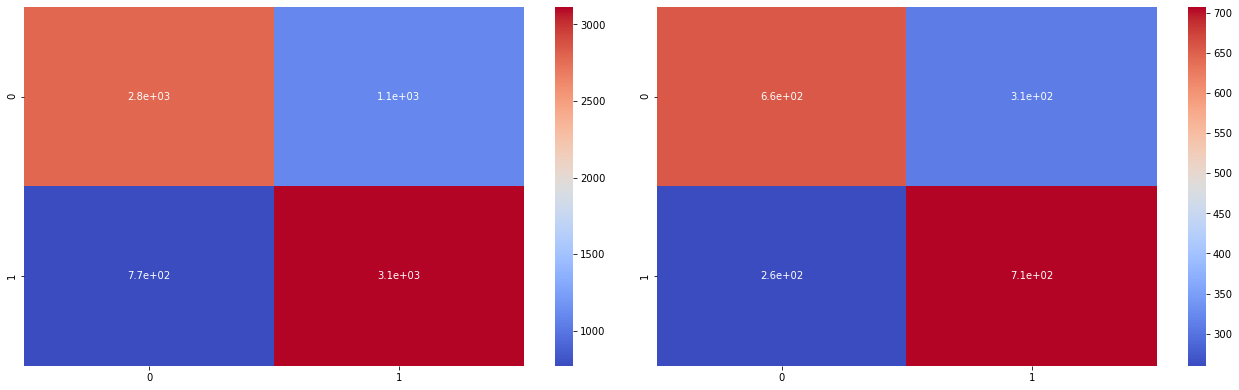

In [112]:
classification_metrics(y_train,y_pred_train,y_test,y_pred_test,True)